In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer


In [3]:
df = pd.read_csv(r"C:\Users\31246\OneDrive - INSTITUTO TECNOLOGICO METROPOLITANO - ITM\Documents\Automatizacion II\lab 1\framingham.csv")


Se basa en un modelo lineal que calcula una combinación lineal de variables predictoras (algoritmo de clasificacion), luego utiliza una función logística o sigmoide para transformarlo en un valor entre 0 y 1 (una probabilidad). el principal objetivo de clasificación es predecir si el paciente tiene un riesgo de enfermedad coronaria (EC) futura a 10 años, y nos plantean las diferentes variables que tiene esta dicha base de datos "1" significa que SI tiene riesgo y "0" que NO.

In [4]:
df.info()

print("Dimensiones del dataset:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
Dimensiones d

Podemos ver las diferentes cacateristicas y varaiables que hay en esta base de datos

In [5]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


la adquisicion de datos fue en una en curso en residentes de la ciudad de Framingham, Massachusetts,donde se evaluaron 15 atributos o datos para poder obtener un resultado y poder obtener un veredicto acerca de si si esta en riesgo cardiovascular o no. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.head()

#identificar variables numéricas y categóricas
numericas = df.select_dtypes(include=['int64', 'float64']).columns
categoricas = df.select_dtypes(include=['object', 'bool', 'category']).columns

#graficas de variables numericas
for col in numericas:
    plt.figure(figsize=(3,2))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# Gráficos de barras para variables categóricas
for col in categoricas:
    plt.figure(figsize=(3,2))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


Se observa una diferencia entre las diferentes columnas o variables que tiene dicha base de datos, y tambien observar que se separan mucho o poco dependiendo el caso y de el target que se tiene de el riesgo de enfermedad coronaria(relacion entre variables predictoras y el target), el analisis o la toma de datos se hizo a una poblacion masculina y fememnina de una edad alrededor de los 20 años a los 70 años de edad

In [7]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Aca se puede observar como en las diferentes columnas de las varibles se da una brrve describcion de ellas

In [8]:
#descripcion para variables numéricas
desc_stats = df.describe().T
display(desc_stats)


mediciones_Extras= df[numericas].agg(['skew', 'kurtosis']).T
display(mediciones_Extras)

#resumen para variables categóricas
for col in categoricas:
    print(f"\nDistribución de categorías en '{col}':")
    print(df[col].value_counts())
    print("-"*50)


,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


,skew,kurtosis
male,0.286135,-1.919033
age,0.228146,-0.989636
education,0.690033,-0.712394
currentSmoker,0.023606,-2.000387
cigsPerDay,1.247910,1.023356
BPMeds,5.550010,28.816384
prevalentStroke,12.909062,164.721624
prevalentHyp,0.819278,-1.329411
diabetes,5.994378,33.948587
totChol,0.871422,4.131582


Estadisticas adicionales de asimetría y curtosis (asimetria que tan dispersos estan las datos
#curtosis que tan aglomerados o que tan reunidos estan en la asimetria)

In [ ]:
#matriz de correlación
Correlacion_matriz = df.corr()

#valores de correlación
display(Correlacion_matriz)

plt.figure(figsize=(10,8))
sns.heatmap(Correlacion_matriz, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación entre variables")
plt.show()



In [10]:
df.isna().sum()
#revisamos a ver si tiene valores faltantes

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

vemos que datos hay faltantes y como organizarlos

In [11]:
#llenar con la media de cada columna
dfmedia= df.fillna(df.mean())

print(dfmedia.isnull().sum())

dfmedia.to_csv("BdmediaC", index=False)



male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


rellenamos datos con la media de la columna y volvemos a verificar y aparce que la base de datos esta completa

In [12]:
num_cols = dfmedia.select_dtypes(include=np.number).columns
print(num_cols)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


Vemos las diferentes columnas y varaibles que tienen la base de datos

In [13]:
df['currentSmoker'].value_counts()

currentSmoker
0    2144
1    2094
Name: count, dtype: int64

aca revise que solo tenga dos valores en la caracteristica de fumadores que no halla una tercera que pued afectar el entrenamiento del modelo

<Axes: >

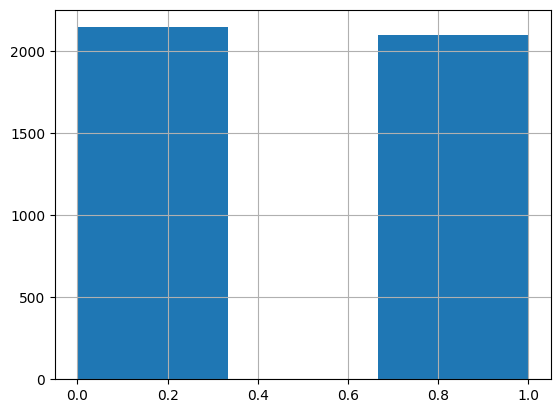

In [14]:
df['currentSmoker'].hist(bins=3)

Reviso igualamnete a partir del punto de referencia de fumadores a ver si hay casi la misma canridad para que el modelo se pueda entrenar y adaptar de forma adecuada y pueda dar una respuesta sesgada

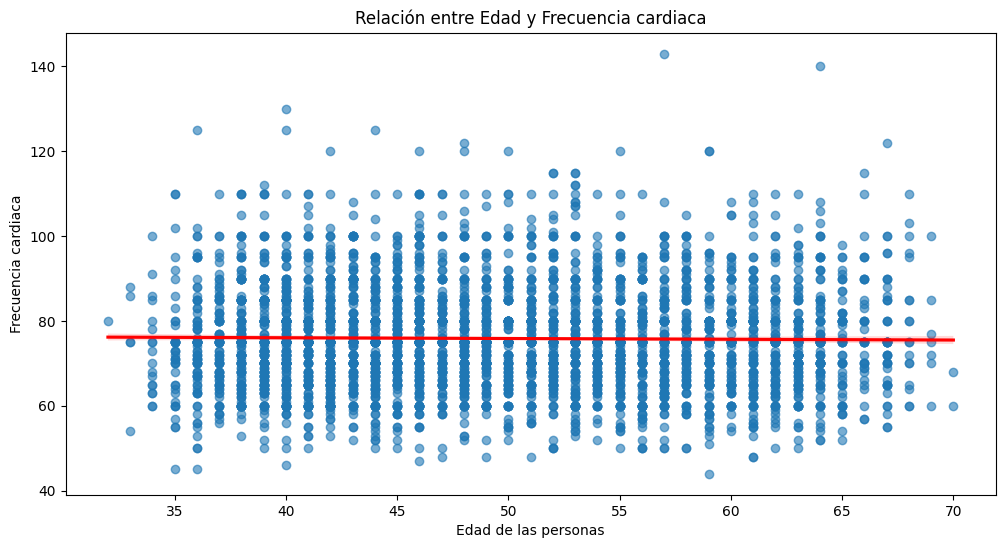

In [15]:
plt.figure(figsize=(12,6))
sns.regplot(x='age', y='heartRate', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})#como afecta entre estas dos variables
plt.xlabel('Edad de las personas')
plt.ylabel('Frecuencia cardiaca')
plt.title('Relación entre Edad y Frecuencia cardiaca')
plt.show()


Si la línea es casi horizontal,significa que la edad no afecta mucho la frecuencia cardiaca, pero si hay diferentes variaciones en las diferentes edades y frecuencias dependiendo de el caso en que se nos este presentando

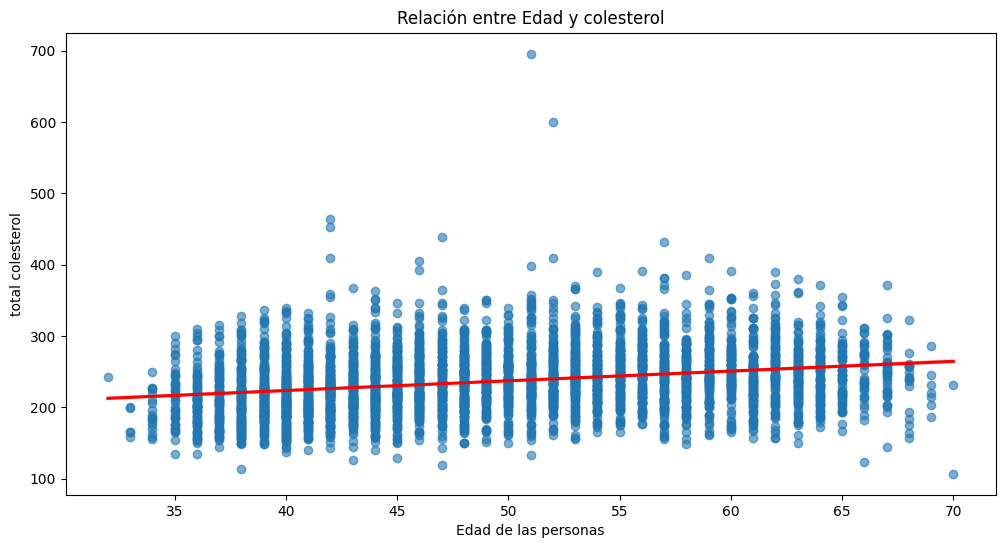

In [16]:
plt.figure(figsize=(12,6))
sns.regplot(x='age', y='totChol', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})#como afecta entre estas dos variables
plt.xlabel('Edad de las personas')
plt.ylabel('total colesterol')
plt.title('Relación entre Edad y colesterol')
plt.show()


Se observa que a mayor la edad varia levemente sus valores de colesterol

In [17]:
#detectar variables categoricas
categoricas = df.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas detectadas:", list(categoricas))

#crear one hotencoder para que combierta todos los datos a numericos
encoder = OneHotEncoder(sparse_output=False, drop='first')
#aplica la variable encoder para que entrene y se aprenda los datos
encoded = encoder.fit_transform(df[categoricas])

# Nombres de columnas codificadas
encoded_cols = encoder.get_feature_names_out(categoricas)

# Convertir a DataFrame
encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=df.index)

# Reemplazar variables categóricas por las codificadas
df = df.drop(columns=categoricas)
df = pd.concat([df, encoded_df], axis=1)

print("Dataset después de la codificación:")
print(df.head())


Variables categóricas detectadas: []
Dataset después de la codificación:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10  

Detecta datos categoricos y numericos y los almacena para convertir todos los datos de la base de datos para convertirlos en numericos


In [18]:
#Separamos caracteristicas y target
target = 'TenYearCHD'
X = df.drop(columns=[target])
y = df[target]

#Creamos el escalador
scaler = StandardScaler()

#ajustamos el escalador a las variables predictoras y transformamos para que entrene y se las parenda
X_scaled = scaler.fit_transform(X)

#convertimos de nuevo a DataFrame para mantener nombres de columnas
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# verificamos resultados: la media debe ser ~0 y la desviación estándar ~1
print("Media después de estandarización:\n", X_scaled.mean().round(2))
print("\nDesviación estándar después de estandarización:\n", X_scaled.std().round(2))

X_scaled.head()


Media después de estandarización:
 male              -0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay        -0.0
BPMeds             0.0
prevalentStroke   -0.0
prevalentHyp      -0.0
diabetes          -0.0
totChol            0.0
sysBP             -0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
dtype: float64

Desviación estándar después de estandarización:
 male               1.0
age                1.0
education          1.0
currentSmoker      1.0
cigsPerDay         1.0
BPMeds             1.0
prevalentStroke    1.0
prevalentHyp       1.0
diabetes           1.0
totChol            1.0
sysBP              1.0
diaBP              1.0
BMI                1.0
heartRate          1.0
glucose            1.0
dtype: float64


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.153192,-1.234951,1.982068,-0.988271,-0.755376,-0.174741,-0.077033,-0.671101,-0.162477,-0.935776,-1.195907,-1.082625,0.286299,0.342704,-0.207320
1,-0.867158,-0.418257,0.020644,-0.988271,-0.755376,-0.174741,-0.077033,-0.671101,-0.162477,0.297822,-0.515187,-0.158988,0.717711,1.590087,-0.249062
2,1.153192,-0.184916,-0.960068,1.011868,0.922662,-0.174741,-0.077033,-0.671101,-0.162477,0.185677,-0.220209,-0.242955,-0.113247,-0.073090,-0.499512
3,-0.867158,1.331800,1.001356,1.011868,1.761681,-0.174741,-0.077033,1.490089,-0.162477,-0.262904,0.800871,1.016549,0.680943,-0.904679,0.877962
4,-0.867158,-0.418257,1.001356,1.011868,1.174368,-0.174741,-0.077033,-0.671101,-0.162477,1.082840,-0.106755,0.092912,-0.662317,0.758498,0.126613


cremaos un escalador para que valla por todas las variables para que saque la media y la desvaicion estandar y calculamos en las diferentes columnas
- Usaremos **StandardScaler** porque es más robusto y funciona bien con la mayoría de modelos (kNN, regresiones, redes neuronales).  
- Los árboles (Random Forest, Gradient Boosting) no lo necesitan, pero no se ven afectados si se estandariza.  


In [19]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = df.select_dtypes(include=['object', 'category']).columns

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False, drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95))  # mantener 95% de la varianza
])


X_processed = pipeline.fit_transform(X)

print("Shape original:", X.shape)
print("Shape despues de PCA:", X_processed.shape)


# 6. División en train, val y test

X_train, X_temp, y_train, y_temp = train_test_split(X_processed, y, test_size=0.30, random_state=42, stratify=y)

# Luego de temp sacamos validación y test (50/50 de ese 30% → 15% y 15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)




Shape original: (4238, 15)
Shape despues de PCA: (4238, 13)
Train: (2966, 13)
Validation: (636, 13)
Test: (636, 13)


Finalmente, dividimos los datos en **70% entrenamiento, 15% validación y 15% prueba**, lo que permite:  
- Entrenar los modelos en el conjunto de entrenamiento.  
- Ajustar hiperparámetros en validación.  
- Evaluar el rendimiento real en el conjunto de prueba.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Modelo kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_train_pred_knn = knn.predict(X_train)
y_val_pred_knn = knn.predict(X_val)
y_test_pred_knn = knn.predict(X_test)

acc_knn_train = accuracy_score(y_train, y_train_pred_knn)
acc_knn_val = accuracy_score(y_val, y_val_pred_knn)
acc_knn_test = accuracy_score(y_test, y_test_pred_knn)

print("kNN  Accuracies Train:", acc_knn_train*100)
print("Val:", acc_knn_val*100)
print("Test:", acc_knn_test*100)

# 2. Modelo Random Forest
rf = RandomForestClassifier(n_estimators=4, random_state=42)#Corrregir el 100 arboles de desicion
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_val_pred_rf = rf.predict(X_val)
y_test_pred_rf = rf.predict(X_test)

acc_rf_train = accuracy_score(y_train, y_train_pred_rf)
acc_rf_val = accuracy_score(y_val, y_val_pred_rf)
acc_rf_test = accuracy_score(y_test, y_test_pred_rf)

print("Random Forest Train:", acc_rf_train*100)
print( "Val:", acc_rf_val*100)
print("Test:", acc_rf_test*100)


kNN  Accuracies Train: 86.81726230613621
Val: 83.64779874213836
Test: 83.49056603773585
Random Forest Train: 95.14497639919082
Val: 83.33333333333334
Test: 83.17610062893081


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Modelo secuencial sencillo
dnn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilación y entrenamiento
dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), verbose=0)

# Evaluación
acc_dnn_train = dnn.evaluate(X_train, y_train, verbose=0)[1]
acc_dnn_val = dnn.evaluate(X_val, y_val, verbose=0)[1]
acc_dnn_test = dnn.evaluate(X_test, y_test, verbose=0)[1]

print("DNN - Accuracies -> Train:", acc_dnn_train, "Val:", acc_dnn_val, "Test:", acc_dnn_test)


c:\Users\31246\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


DNN - Accuracies -> Train: 0.8924477696418762 Val: 0.8191823959350586 Test: 0.8349056839942932


In [31]:
# Crear tabla comparativa
results = pd.DataFrame({
    'Modelo': ['kNN', 'Random Forest', 'DNN'],
    'Train Accuracy': [acc_knn_train, acc_rf_train, acc_dnn_train],
    'Validation Accuracy': [acc_knn_val, acc_rf_val, acc_dnn_val],
    'Test Accuracy': [acc_knn_test, acc_rf_test, acc_dnn_test]
})

display(results)


,Modelo,Train Accuracy,Validation Accuracy,Test Accuracy
0,kNN,0.868173,0.836478,0.834906
1,Random Forest,0.951450,0.833333,0.831761
2,DNN,0.892448,0.819182,0.834906


In [23]:
# Crear muestra artificial con los nombres exactos de tus columnas
sample_dict = {col: [0] for col in X.columns}  # por defecto valores 0
sample_dict['age'] = [55]        # ejemplo: edad = 55
sample_dict['chol'] = [240]      # ejemplo: colesterol
sample_dict['trestbps'] = [140]  # ejemplo: presión arterial

# Convertir a DataFrame
sample_df = pd.DataFrame(sample_dict)

# Procesar con el pipeline
sample_processed = pipeline.transform(sample_df)

# Predicción
prediction = dnn.predict(sample_processed)
print("Probabilidad de clase positiva:", prediction[0][0])
print("Clase predicha:", int(prediction[0][0] >= 0.5))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Probabilidad de clase positiva: 0.07424012
Clase predicha: 0


In [24]:
# =========================
# Procesamos la muestra artificial con el pipeline
# =========================
sample_processed = pipeline.transform(sample_df)

#1. Predicción con kNN
knn_pred = knn.predict(sample_processed)
knn_prob = knn.predict_proba(sample_processed)[0][1]  # probabilidad clase positiva
print("kNN -> Clase:", knn_pred[0], "| Probabilidad de clase positiva:", knn_prob)

# =========================
# 2. Predicción con Random Forest
# =========================
rf_pred = rf.predict(sample_processed)
rf_prob = rf.predict_proba(sample_processed)[0][1]
print("Random Forest -> Clase:", rf_pred[0], "| Probabilidad de clase positiva:", rf_prob)

# =========================
# 3. Predicción con DNN
# =========================
dnn_prob = dnn.predict(sample_processed)[0][0]
dnn_pred = int(dnn_prob >= 0.5)
print("DNN -> Clase:", dnn_pred, "| Probabilidad de clase positiva:", dnn_prob)


kNN -> Clase: 0 | Probabilidad de clase positiva: 0.2
Random Forest -> Clase: 1 | Probabilidad de clase positiva: 0.54
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
DNN -> Clase: 0 | Probabilidad de clase positiva: 0.07424012
